# Example 15: Catalog of published nonlinear curves

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import pystrata

%load_ext lab_black
%matplotlib inline

In [2]:
pystrata.site._load_published_curves()
models = pystrata.site.PUBLISHED_CURVES

In [3]:
df = pd.DataFrame(models).T.reset_index(drop=True)
df[["source", "suffix"]] = df.name.str.split(",", expand=True)

In [4]:
print("\n".join(df["source"].unique()))

Vucetic & Dobry (91)
EPRI (93)
GEI (83)
GeoMatrix (1990)
Idriss (1990)
Imperial Valley Soils
Iwasaki
Peninsular Range
Seed & Idriss


In [5]:
def plot_group(group, title="", cycle_colors=False, label=False):
    fig, axes = plt.subplots(nrows=2, sharex=True, subplot_kw=dict(xscale="log"))

    for i, row in group.reset_index(drop=True).iterrows():

        for ax, prop in zip(axes, ["mod_reduc", "damping"]):
            if pd.isna(row[prop]):
                continue

            ax.plot(
                row[prop]["strains"],
                row[prop]["values"],
                color=f"C{i}" if cycle_colors else "C0",
                label=row["suffix"].strip() if label else None,
            )

    axes[0].set(ylabel="G/G$_{max}$")
    if title:
        axes[0].set_title(title)

    axes[1].set(ylabel="Damping (dec)", xlabel="Strain (dec)")

    if label:

        def get_labels(ax):
            return sorted([l.get_label() for l in ax.get_lines()])

        labels = [get_labels(ax) for ax in axes]
        if len(labels[1]):
            # Prefer to label damping
            axes[1].legend(
                loc="upper left",
                fontsize="x-small",
                ncols=2 if len(labels[1]) > 7 else 1,
            )
        # Add to shear-mod if different
        if labels[0] != labels[1] and len(labels[0]):
            axes[0].legend(
                loc="lower left",
                fontsize="x-small",
                ncols=2 if len(labels[0]) > 7 else 1,
            )

    fig.tight_layout()
    return fig, axes

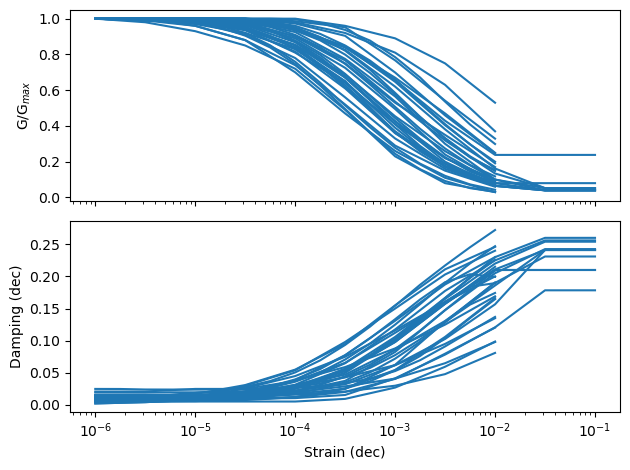

In [6]:
fig, axes = plot_group(df, cycle_colors=False, label=False)
plt.show(fig)

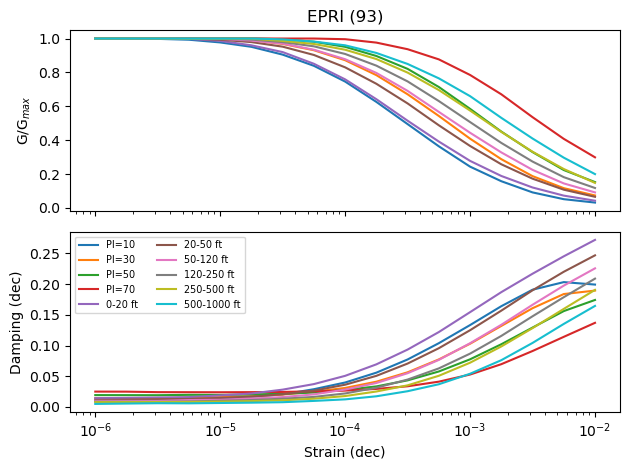

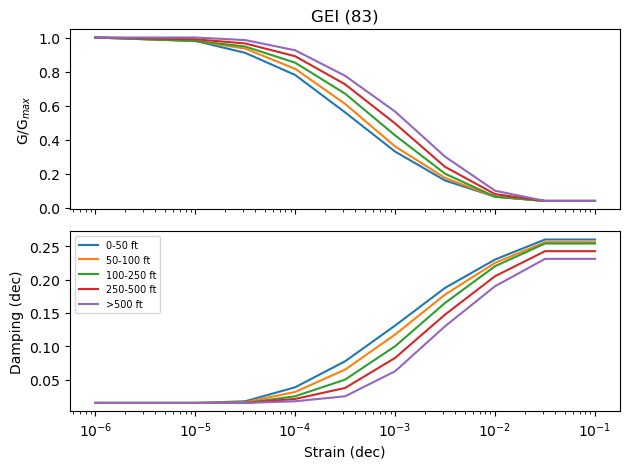

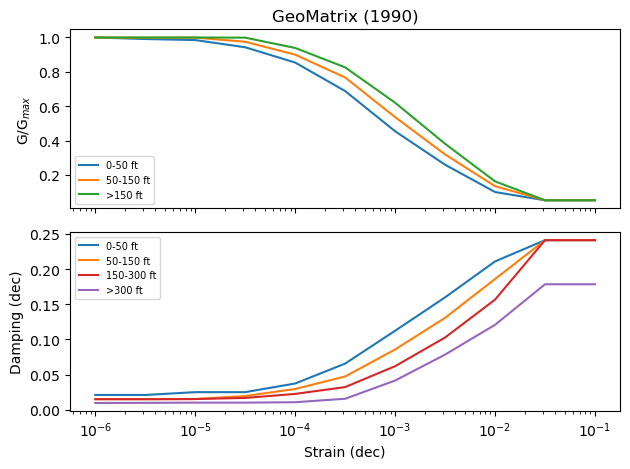

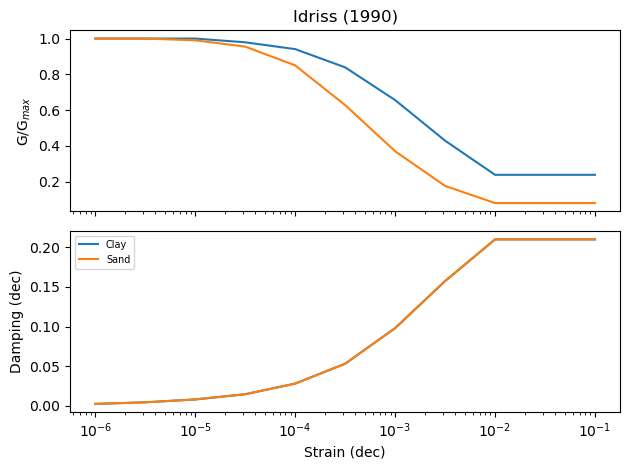

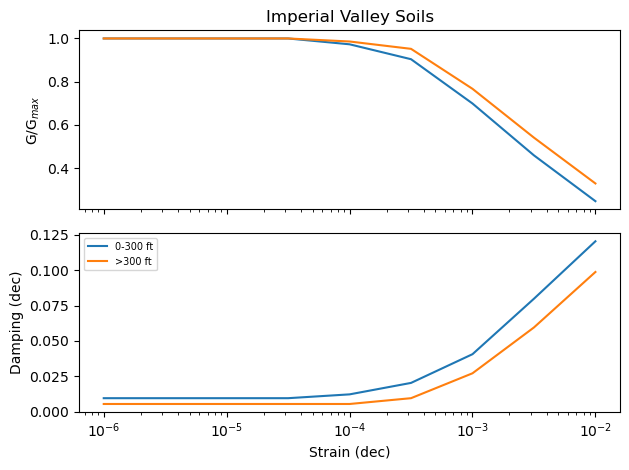

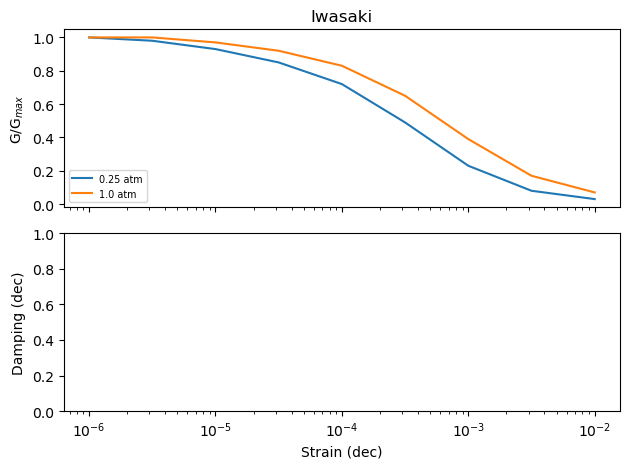

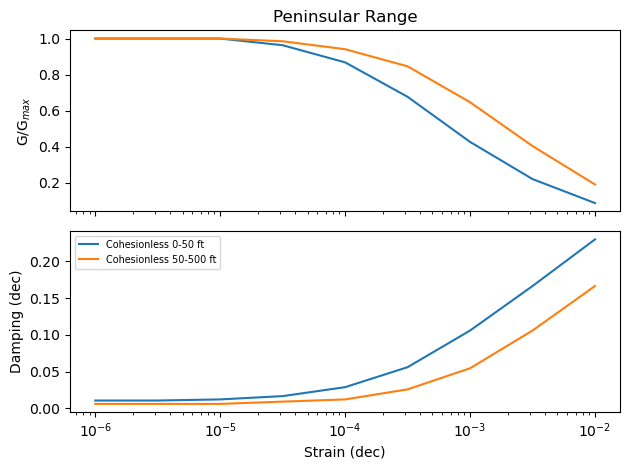

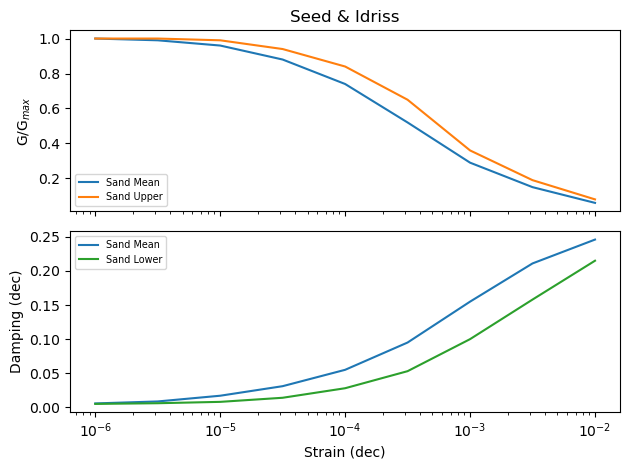

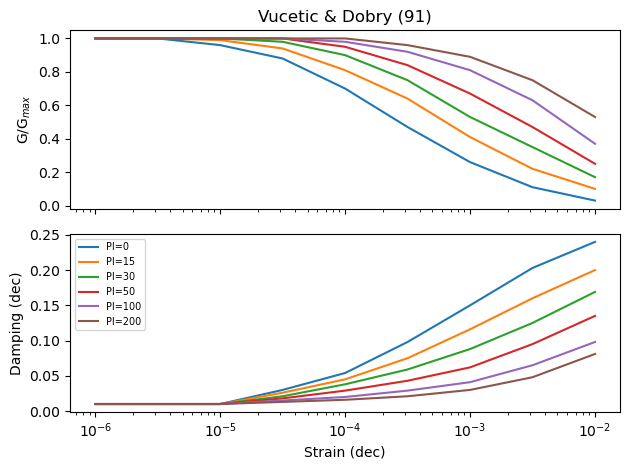

In [7]:
for name, group in df.groupby("source"):
    fig, axes = plot_group(group, name, cycle_colors=True, label=True)
    plt.show(fig)